In [1]:
import pandas as pd
import numpy as np
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
cred = credentials.Certificate("neuroverse-dev-firebase-adminsdk-fcf8a-8ec8b77b64.json")
firebase_admin.initialize_app(cred)

In [4]:
db = firestore.client()
collection = db.collection("neurospect").stream()

In [5]:
users_dict = list(map(lambda x: x.to_dict(), collection))
df = pd.DataFrame(users_dict)

df

,speed,chosenSetList,userID,prosScores,testID,lastUpdated,prosSpeeds,execScore,gameVersion,execData,shapesListList,accuracy,attentionScoreColors,recall,attentionScoreShapes,visuospatial,processingSpeedColors,processingSpeedShapes,processingSpeedColorsList,visuospatialSpeed,shapeListColors,visuospatialAnswers,shapeListShapes,attentionColorsList,attentionShapesList,processingSpeedShapesList,recalledWords
0,1702.1,"[Shape, Color, Pattern, Shape, Color, Shape, S...",None,"{'scores': [3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 2.5,...",55198e94fdf99b36282b8a38,14/11/2023,"{'speeds': [181, 184, 411, 413, 822, 823, 978,...",8.74,2,"[0.741, 1, 1, 1, 1, 1, 1, 1, 1]","{'7': [85, 43, 43, 24, 69, 25, 9, 24], '9': [3...",73.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3998.3,"[Shape, Color, Pattern, Color, Shape, Color, C...",None,"{'scores': [3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4...",55780ee6fdf99b4cbc0aef95,14/11/2023,"{'speeds': [997, 998, 655, 656, 1361, 1362, 17...",8.03,2,"[0.549, 1, 1, 0.741, 0.741, 1, 1, 1, 1]","{'7': [110, 74, 0, 4, 75, 33, 108, 36], '9': [...",86.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,None,NaN,55cb07c5fdf99b0b55d631c1,"20/7/2023, 7:24:15 am",NaN,NaN,2,NaN,NaN,NaN,28.0,4.0,28.0,15.0,675.0,704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,None,NaN,563da4c4ef3f15000bb92b64,"19/07/2023, 14:29:31",NaN,NaN,NaN,NaN,NaN,NaN,28.0,6.0,26.0,14.0,681.0,788.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,None,NaN,5641c95d17bdbe00102a0b51,"7/28/2023, 8:20:52 AM",NaN,NaN,study,NaN,NaN,NaN,29.0,6.0,25.0,15.0,821.0,905.0,"[1501, 179, 885, 624, 891, 923, 994, 909, 749,...","[4394, 3280, 1926, 1916, 5144, 2479, 2256, 553...","[red,circle,orange,triangle, purple,triangle,p...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[blue,circle,green,circle, green,triangle,gree...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[1191, 752, 1163, 878, 1275, 881, 858, 618, 63...","[Elephant, Truck, Guitar, History, Orange, Ban..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,NaN,NaN,k1pEx4d88hODssMKPqx8rUgZjkO2,NaN,None,3/8/2023 5:27:48 ب.د.,NaN,NaN,study,NaN,NaN,NaN,29.0,6.0,22.0,15.0,772.0,898.0,"[1295, 1501, 922, 773, 874, 691, 805, 670, 736...","[2095, 3031, 1365, 1502, 1598, 2083, 1767, 186...","[blue,pentagon,red,pentagon, blue,diamond,blue...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[green,diamond,green,circle, orange,square,pur...","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, ...","[1501, 1501, 958, 811, 642, 492, 1110, 757, 80...","[Guitar, Orange, Banana, Australia, Truck, Ten..."
625,NaN,NaN,None,NaN,None,9/22/2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,1366.1,"[Shape, Color, Pattern, Shape, Color, Shape, S...",None,"{'scores': [3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4...",pickle,11/14/2023,"{'speeds': [197, 197, 66, 67, 589, 590, 925, 9...",7.45,2,"[0.741, 1, 1, 0.741, 0.741, 0.741, 1, 0.741, 0...","{'7': [124, 6, 122, 124, 14, 106, 120, 96], '9...",96.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
627,NaN,NaN,zGgBBC7DJIhJWtDqBvWB4duSmCz2,NaN,None,"7/22/2023, 9:57:19 AM",NaN,NaN,NaN,NaN,NaN,NaN,18.0,7.0,18.0,9.0,1014.0,1062.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
demo = pd.read_csv("Demo-Exec.csv")
demo = demo.rename(columns={"Participant id": "testID"})
demo.head()

,Submission id,testID,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,656f9e7149d8c6715cfbb9ce,5e35f6e32878165acc962c79,AWAITING REVIEW,2023-12-05T22:04:39.854000Z,2023-12-05T22:26:26.865000Z,NaN,2023-12-05T22:26:27.324763Z,1308.0,NOCODE,259,40,Female,White,United Kingdom,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
1,656f9fd967ad9b5ccaeff2f9,654e3b2a1d5b25b892be6421,AWAITING REVIEW,2023-12-05T22:10:40.125000Z,2023-12-05T22:37:58.429000Z,NaN,2023-12-05T22:37:58.867857Z,1639.0,NOCODE,32,50,Male,White,Canada,Canada,Canada,English,No,Other
2,656fa019ebb52c7019b43e7e,602660bbefd9642c772d2290,AWAITING REVIEW,2023-12-05T22:11:48.134000Z,2023-12-05T22:47:49.185000Z,NaN,2023-12-05T22:47:49.654763Z,2162.0,NOCODE,575,45,Female,Asian,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
3,656fa0516660e185c0504e6d,6558e1d7dd30b28341934dd5,AWAITING REVIEW,2023-12-05T22:13:07.701000Z,2023-12-05T22:45:35.559000Z,NaN,2023-12-05T22:45:36.035979Z,1948.0,NOCODE,5,41,Male,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
4,656fa05322539765e29cf558,6022e90eaccb290e2f1b07a2,AWAITING REVIEW,2023-12-05T22:18:57.104000Z,2023-12-05T22:51:55.562000Z,NaN,2023-12-05T22:51:56.208110Z,1979.0,NOCODE,734,42,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,"Not in paid work (e.g. homemaker', 'retired or..."


In [13]:
study_data = pd.merge(df, demo, on='testID')
study_data

,speed,chosenSetList,userID,prosScores,testID,lastUpdated,prosSpeeds,execScore,gameVersion,execData,shapesListList,accuracy,attentionScoreColors,recall,attentionScoreShapes,visuospatial,processingSpeedColors,processingSpeedShapes,processingSpeedColorsList,visuospatialSpeed,shapeListColors,visuospatialAnswers,shapeListShapes,attentionColorsList,attentionShapesList,processingSpeedShapesList,recalledWords,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,2437.43,"[Shape, Color, Pattern, Shape, Color, Shape, C...",None,"{'scores': [3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4...",59779749d5ddf60001d14bee,06/12/2023,"{'speeds': [357, 359, 303, 304, 555, 556, 527,...",10.22,2,"[1, 1, 1, 0.819, 0.741, 1, 0.741, 1, 1, 0.368,...","{'13': [], '7': [431, 450, 304, 304, 44, 329, ...",91.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6570d44015730b0f6ea3572b,AWAITING REVIEW,2023-12-06T20:06:29.938000Z,2023-12-06T20:17:03.675000Z,NaN,2023-12-06T20:17:05.023806Z,634.0,COQ89QD3,1273,40,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Part-Time
1,20604.05,"[Shape, Color, Pattern, Shape, Pattern, Shape,...",None,"{'scores': [3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 1.85...",597e0d5f37978a00016b4e6a,06/12/2023,"{'speeds': [1625, 1625, 417, 417, 1119, 1119, ...",9.72,2,"[1, 1, 0.449, 1, 0.037, 1, 0.497, 1, 1, 1, 0.7...","{'13': [], '7': [409, 42, 460, 463, 92, 410, 9...",61.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6570d200f809227902a24077,AWAITING REVIEW,2023-12-06T19:56:53.854000Z,2023-12-06T20:18:11.489000Z,NaN,2023-12-06T20:18:12.012382Z,1278.0,COQ89QD3,22,44,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Part-Time
2,455.90,"[Shape, Color, Pattern, Color, Shape, Pattern,...",None,"{'scores': [3, 3, 1.81, 1.81, 1.59, 1.59, 1.45...",5a2ef9bbfd28e9000102ee68,14/11/2023,"{'speeds': [120, 125, 270, 272, 316, 319, 136,...",8.21,2,"[0.301, 1, 1, 1, 0.905, 1, 1, 1, 1]","{'7': [49, 104, 94, 104, 62, 67, 49, 99], '9':...",54.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656fa149769109afcaf90c0d,RETURNED,2023-12-05T22:16:47.180000Z,NaN,NaN,NaN,NaN,NaN,1847,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED,CONSENT_REVOKED
3,1410.43,"[Shape, Color, Pattern, Shape, Color, Shape, S...",None,"{'scores': [3, 3, 3, 3, 3, 3, 3, 3, 2.2, 2.2, ...",5be742980bedce00010bcf31,06/12/2023,"{'speeds': [81, 82, 9221, 9222, 2502, 2504, 38...",9.96,2,"[1, 1, 1, 0.549, 0.549, 0.67, 1, 0.741, 1, 1, ...","{'13': [], '7': [188, 93, 508, 363, 235, 327, ...",64.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6570d43ab8359036bf8d8eed,AWAITING REVIEW,2023-12-06T20:06:25.333000Z,2023-12-06T20:14:59.784000Z,NaN,2023-12-06T20:15:03.653869Z,515.0,COQ89QD3,1812,40,Male,White,United Kingdom,United Kingdom,United Kingdom,English,DATA_EXPIRED,Part-Time
4,4709.35,"[Shape, Color, Pattern, Color, Pattern, Shape,...",None,"{'scores': [3, 3, 3, 3, 3, 3, 1.15, 1.15, 1.31...",5c50be96d5f934000198d407,06/12/2023,"{'speeds': [269, 271, 256, 257, 1151, 1152, 92...",9.48,2,"[1, 1, 1, 1, 0.301, 1, 0.549, 0.407, 1, 0.549,...","{'13': [], '7': [236, 165, 92, 343, 35, 438, 8...",71.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6570d4765a6d2b943074643a,AWAITING REVIEW,2023-12-06T20:07:24.610000Z,2023-12-06T20:18:02.516000Z,NaN,2023-12-06T20:18:03.015161Z,638.0,COQ89QD3,205,41,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
5,1062.53,"[Shape, Color, Pattern, Shape, Pattern, Color,...",None,"{'scores': [3, 3, 1.5, 1.5, 1.27, 1.27, 1.2, 1...",5c87aa3539b9760017938cf2,06/12/2023,"{'speeds': [120, 122, 93, 95, 329, 331, 421, 4...",8.96,2,"[1, 0.905, 1, 1, 0.333, 0.905, 0.301, 0.223, 0...","{'13': [], '7': [351, 63, 

In [14]:
study_data.columns

Index(['speed', 'chosenSetList', 'userID', 'prosScores', 'testID',
       'lastUpdated', 'prosSpeeds', 'execScore', 'gameVersion', 'execData',
       'shapesListList', 'accuracy', 'attentionScoreColors', 'recall',
       'attentionScoreShapes', 'visuospatial', 'processingSpeedColors',
       'processingSpeedShapes', 'processingSpeedColorsList',
       'visuospatialSpeed', 'shapeListColors', 'visuospatialAnswers',
       'shapeListShapes', 'attentionColorsList', 'attentionShapesList',
       'processingSpeedShapesList', 'recalledWords', 'Submission id', 'Status',
       'Started at', 'Completed at', 'Reviewed at', 'Archived at',
       'Time taken', 'Completion code', 'Total approvals', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status'],
      dtype='object')

In [17]:
study_data.drop(['attentionScoreColors',
       'attentionScoreShapes', 'visuospatial', 'processingSpeedColors',
       'processingSpeedShapes', 'processingSpeedColorsList',
       'visuospatialSpeed', 'shapeListColors', 'visuospatialAnswers',
       'shapeListShapes', 'attentionColorsList', 'attentionShapesList',
       'processingSpeedShapesList'], axis=1, inplace=True)
study_data

KeyError: "['attentionScoreColors' 'attentionScoreShapes' 'visuospatial'\n 'processingSpeedColors' 'processingSpeedShapes'\n 'processingSpeedColorsList' 'visuospatialSpeed' 'shapeListColors'\n 'visuospatialAnswers' 'shapeListShapes' 'attentionColorsList'\n 'attentionShapesList' 'processingSpeedShapesList'] not found in axis"

In [24]:
#study_data = study_data[study_data["Status"] == "APPROVED"]
sum(study_data.execScore.dropna())/len(study_data.execScore.dropna())

9.663529411764706

In [16]:
print("Average Executive " + str(sum(study_data["execScore"])/len(study_data["execScore"])))
print("Average Processing Speed " + str(sum(study_data["speed"])/len(study_data["speed"])))
print("Average Processing Speed Accuracy " + str(sum(study_data["accuracy"])/len(study_data["accuracy"])))

Average Executive nan
Average Processing Speed nan
Average Processing Speed Accuracy nan


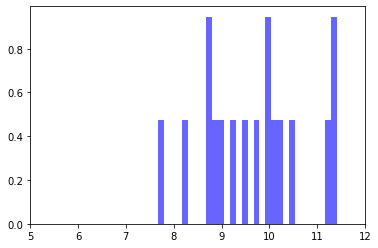

In [29]:
plt.hist(study_data["execScore"], 30, density=True, alpha=0.6, color='b')
plt.xlim(5, 12)
plt.show()

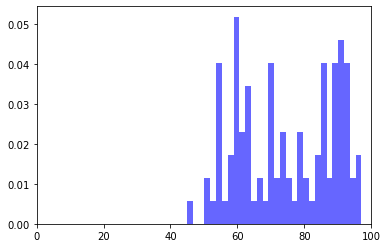

In [25]:
plt.hist(study_data["accuracy"], 30, density=True, alpha=0.6, color='b')
plt.xlim(0, 100)
plt.show()

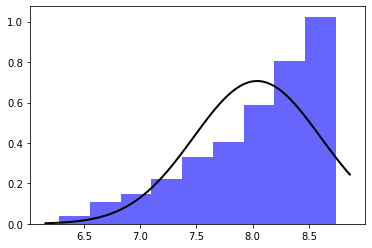

In [30]:
from scipy.stats import norm 
mu, std = norm.fit(study_data["execScore"])
plt.hist(study_data["execScore"], bins=9, density=True, alpha=0.6, color='b') 

xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 
  
plt.plot(x, p, 'k', linewidth=2) 
  
plt.show() 

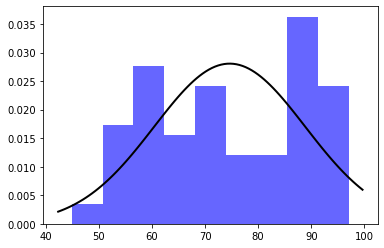

In [27]:
from scipy.stats import norm 
mu, std = norm.fit(study_data["accuracy"])
plt.hist(study_data["accuracy"], bins=9, density=True, alpha=0.6, color='b') 

xmin, xmax = plt.xlim() 
x = np.linspace(xmin, xmax, 100) 
p = norm.pdf(x, mu, std) 
  
plt.plot(x, p, 'k', linewidth=2) 
  
plt.show() 

In [28]:
from scipy.stats import skew 
from scipy.stats import kurtosis 

print(kurtosis(study_data["execScore"], bias=True))
print(kurtosis(study_data["accuracy"], bias=True))

0.08560221708930849
-1.380779889766141


In [29]:
print(skew(study_data["execScore"], bias=True))
print(skew(study_data["accuracy"], bias=True))

-0.8356039615005638
-0.09617810389575558


## Temporary Manual Method

In [2]:
data = []

def get_user_input(column_name):
    user_input = input(f"Enter value for {column_name}: ")
    return user_input

def add_row_to_dataframe(dataframe, row_values):
    dataframe.loc[len(dataframe)] = row_values

In [3]:
columns = ['ID', 'attentionColors', 'attentionShapes', 'gameVersion', 'speedColors', 'speedShapes', 'recall', 'visuospatial']
df = pd.DataFrame(columns=columns)

In [12]:
cont = True;

while cont:
    row_values = []
    for col in columns:
        user_input = get_user_input(col)
        row_values.append(user_input)

    add_row_to_dataframe(df, row_values)

    continue_input = input("Press Enter to add another row or press 'e' to escape: ")
    if continue_input == "End add":
        cont = False

In [17]:
df_fix = df.drop(df[df["visuospatial"] == ""].index)
df_fix

,ID,attentionColors,attentionShapes,gameVersion,speedColors,speedShapes,recall,visuospatial
0,55cb07c5fdf99b0b55d631c1,28,28,2,675,704,4,15
1,563da4c4ef3f15000bb92b64,28,26,1,681,788,6,14
2,56984ed4b0e165000c00f0b5,30,30,2,752,838,6,15
3,56ca3e3237d66c000c59a891,25,14,2,746,996,2,0
4,56ebadebcdfa81000d9e2b67,27,27,2,668,583,8,15
...,...,...,...,...,...,...,...,...
184,647e4385dde02a50cce2964f,27,23,2,828,904,2,15
185,647fba9dea93dc02a681c63b,29,29,2,680,629,4,15
186,648868c355e5b891758c5767,28,28,1,751,775,5,14
187,64908b5b42e39f2736fda389,30,28,1,715,680,6,15


In [18]:
df_fix.to_csv('gameplay_data.csv', index=False)

# Identifying Tertiles

In [16]:
acTer, asTer, pscTer, pssTer, recTer, visTer = study_data['attentionScoreColors'].quantile([1/3,2/3]).tolist(), study_data['attentionScoreShapes'].quantile([1/3,2/3]).tolist(), study_data['processingSpeedColors'].quantile([1/3,2/3]).tolist(), study_data['processingSpeedShapes'].quantile([1/3,2/3]).tolist(), study_data['recall'].quantile([1/3,2/3]).tolist(), study_data['visuospatial'].quantile([1/3,2/3]).tolist()

In [17]:
print("Attention (Colors) Score Tertile Separaters:", acTer, "/ 30\nAttention (Shapes) Score Tertile Separaters:", asTer, "/ 30\nProcessing Speed (Colors) Score Tertile Separaters:", pscTer, "/ 1500\nProcessing Speed (Shapes) Score Tertile Separaters:", pssTer, "/ 1500\nVisuospatial Score Tertile Separaters:", visTer, "/ 15\nRecall Score Tertile Separaters:", recTer, "/ 8")

Attention (Colors) Score Tertile Separaters: [22.333333333333332, 26.666666666666664] / 30
Attention (Shapes) Score Tertile Separaters: [26.0, 27.0] / 30
Processing Speed (Colors) Score Tertile Separaters: [780.3333333333334, 904.3333333333333] / 1500
Processing Speed (Shapes) Score Tertile Separaters: [768.0, 884.0] / 1500
Visuospatial Score Tertile Separaters: [12.0, 14.0] / 15
Recall Score Tertile Separaters: [4.333333333333332, 7.0] / 8


# Gathering and Merging Demographic Data

In [19]:
version1_1 = pd.read_csv('batch1-20.csv')
version1_2 = pd.read_csv('batch1-55.csv')
version2_1 = pd.read_csv('batch2_40plus.csv')
version2_2 = pd.read_csv('batch2_40under.csv')

In [21]:
demographics = pd.concat([version1_1, version1_2, version2_1, version2_2])
demographics

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,64b7679f19f60a314ff5019b,60fcdf59eae5b7d5bddf4610,APPROVED,2023-07-19T04:33:38.636000Z,2023-07-19T04:39:05.297000Z,2023-07-19T05:46:49.168000,2023-07-19T04:39:05.712247Z,327,COQ89QD3,148,22,Female,White,Canada,Canada,Canada,English,Yes,Other
1,64b76809d1ba60ecf29eccd1,5d552a7ed468ef001894616d,APPROVED,2023-07-19T04:35:25.977000Z,2023-07-19T04:42:15.624000Z,2023-07-19T05:46:49.285000,2023-07-19T04:42:16.143378Z,410,COQ89QD3,308,64,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
2,64b76849ba70506de87e905c,616889dc0a398a770bfd5fa8,APPROVED,2023-07-19T04:36:31.751000Z,2023-07-19T04:43:41.970000Z,2023-07-19T05:46:49.390000,2023-07-19T04:43:42.435397Z,431,COQ89QD3,157,29,Female,White,Australia,Australia,Australia,English,No,Other
3,64b7684ad4e27a3da2234863,642b6c88903ad5c8e4140002,APPROVED,2023-07-19T04:36:31.247000Z,2023-07-19T04:41:34.534000Z,2023-07-19T05:46:49.496000,2023-07-19T04:41:35.034520Z,304,COQ89QD3,76,33,Female,Asian,Korea,Australia,Korea,Korean,No,DATA_EXPIRED
4,64b7686ad3eff2bbf7dc065c,63e57180bccc45ed4eac6282,APPROVED,2023-07-19T04:37:10.185000Z,2023-07-19T04:41:32.711000Z,2023-07-19T05:46:49.602000,2023-07-19T04:41:33.196354Z,263,COQ89QD3,116,33,Female,White,United Kingdom,Australia,United Kingdom,English,No,Full-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,64b8737637951bfef6230bfa,5a3da8201950a80001e7b107,APPROVED,2023-07-19T23:36:30.617000Z,2023-07-19T23:43:12.980000Z,2023-07-21T00:05:23.843000,2023-07-19T23:43:13.422893Z,403,COQ89QD3,111,34,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
26,64b873841ba17e6ac5a7bac2,6278d8237bb2ba9e1f2006f4,APPROVED,2023-07-19T23:36:41.024000Z,2023-07-19T23:48:11.973000Z,2023-07-21T00:05:23.963000,2023-07-19T23:48:12.831332Z,691,COQ89QD3,79,30,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
27,64b873fae3da625f2017d359,647207b686d69195c91ed6bc,APPROVED,2023-07-19T23:38:34.215000Z,2023-07-19T23:45:24.313000Z,2023-07-21T00:05:24.086000,2023-07-19T23:45:24.983439Z,411,COQ89QD3,69,23,Female,White,Australia,Australia,Australia,English,No,Part-Time
28,64b877c99c77ec0803523cf3,62e09943165d4dadd8b8f096,APPROVED,2023-07-19T23:54:49.830000Z,2023-07-20T00:00:30.692000Z,2023-07-21T00:05:24.231000,2023-07-20T00:04:07.485187Z,341,COQ89QD3,569,20,Male,Asian,United Kingdom,United Kingdom,United Kingdom,English,Yes,Other


In [25]:
demographics.rename(columns = {'Participant id':'ID'}, inplace = True)
demographics

,Submission id,ID,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,64b7679f19f60a314ff5019b,60fcdf59eae5b7d5bddf4610,APPROVED,2023-07-19T04:33:38.636000Z,2023-07-19T04:39:05.297000Z,2023-07-19T05:46:49.168000,2023-07-19T04:39:05.712247Z,327,COQ89QD3,148,22,Female,White,Canada,Canada,Canada,English,Yes,Other
1,64b76809d1ba60ecf29eccd1,5d552a7ed468ef001894616d,APPROVED,2023-07-19T04:35:25.977000Z,2023-07-19T04:42:15.624000Z,2023-07-19T05:46:49.285000,2023-07-19T04:42:16.143378Z,410,COQ89QD3,308,64,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,"Not in paid work (e.g. homemaker', 'retired or..."
2,64b76849ba70506de87e905c,616889dc0a398a770bfd5fa8,APPROVED,2023-07-19T04:36:31.751000Z,2023-07-19T04:43:41.970000Z,2023-07-19T05:46:49.390000,2023-07-19T04:43:42.435397Z,431,COQ89QD3,157,29,Female,White,Australia,Australia,Australia,English,No,Other
3,64b7684ad4e27a3da2234863,642b6c88903ad5c8e4140002,APPROVED,2023-07-19T04:36:31.247000Z,2023-07-19T04:41:34.534000Z,2023-07-19T05:46:49.496000,2023-07-19T04:41:35.034520Z,304,COQ89QD3,76,33,Female,Asian,Korea,Australia,Korea,Korean,No,DATA_EXPIRED
4,64b7686ad3eff2bbf7dc065c,63e57180bccc45ed4eac6282,APPROVED,2023-07-19T04:37:10.185000Z,2023-07-19T04:41:32.711000Z,2023-07-19T05:46:49.602000,2023-07-19T04:41:33.196354Z,263,COQ89QD3,116,33,Female,White,United Kingdom,Australia,United Kingdom,English,No,Full-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,64b8737637951bfef6230bfa,5a3da8201950a80001e7b107,APPROVED,2023-07-19T23:36:30.617000Z,2023-07-19T23:43:12.980000Z,2023-07-21T00:05:23.843000,2023-07-19T23:43:13.422893Z,403,COQ89QD3,111,34,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
26,64b873841ba17e6ac5a7bac2,6278d8237bb2ba9e1f2006f4,APPROVED,2023-07-19T23:36:41.024000Z,2023-07-19T23:48:11.973000Z,2023-07-21T00:05:23.963000,2023-07-19T23:48:12.831332Z,691,COQ89QD3,79,30,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
27,64b873fae3da625f2017d359,647207b686d69195c91ed6bc,APPROVED,2023-07-19T23:38:34.215000Z,2023-07-19T23:45:24.313000Z,2023-07-21T00:05:24.086000,2023-07-19T23:45:24.983439Z,411,COQ89QD3,69,23,Female,White,Australia,Australia,Australia,English,No,Part-Time
28,64b877c99c77ec0803523cf3,62e09943165d4dadd8b8f096,APPROVED,2023-07-19T23:54:49.830000Z,2023-07-20T00:00:30.692000Z,2023-07-21T00:05:24.231000,2023-07-20T00:04:07.485187Z,341,COQ89QD3,569,20,Male,Asian,United Kingdom,United Kingdom,United Kingdom,English,Yes,Other


In [26]:
gameplay_demographics = pd.merge(df_fix, demographics, on="ID")
gameplay_demographics

,ID,attentionColors,attentionShapes,gameVersion,speedColors,speedShapes,recall,visuospatial,Submission id,Status,...,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
0,55cb07c5fdf99b0b55d631c1,28,28,2,675,704,4,15,64b86fb64fd40563cbe9d5cd,APPROVED,...,116,33,Female,White,Australia,Australia,Australia,English,Yes,Other
1,563da4c4ef3f15000bb92b64,28,26,1,681,788,6,14,64b76c8621d4f3b3fe6e6f92,APPROVED,...,895,38,Female,White,Australia,Australia,Australia,English,No,Full-Time
2,56984ed4b0e165000c00f0b5,30,30,2,752,838,6,15,64b86f3c5ca58cc5ce523cdc,APPROVED,...,19,33,Female,White,United States,United States,United States,English,No,Part-Time
3,56ca3e3237d66c000c59a891,25,14,2,746,996,2,0,64b876422a9931ac736cb46d,APPROVED,...,3031,43,Male,White,United States,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
4,56ebadebcdfa81000d9e2b67,27,27,2,668,583,8,15,64b87323decaab42d8be9a51,APPROVED,...,1704,33,Female,Mixed,Canada,Canada,Canada,English,No,Full-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,647e4385dde02a50cce2964f,27,23,2,828,904,2,15,64b8772abbb2af7dcf7b0f38,APPROVED,...,77,51,Female,White,United States,United States,United States,English,No,Full-Time
170,647fba9dea93dc02a681c63b,29,29,2,680,629,4,15,64b87281ebed922eef8ca227,APPROVED,...,32,26,Male,White,Canada,Canada,Canada,English,No,Full-Time
171,648868c355e5b891758c5767,28,28,1,751,775,5,14,64b7699f1cf616bd2dd421d4,APPROVED,...,34,22,Female,Asian,Canada,Canada,Canada,English,Yes,Unemployed (and job seeking)
172,64908b5b42e39f2736fda389,30,28,1,715,680,6,15,64b76a4c5cbeca44c69a9d74,APPROVED,...,22,23,Female,White,Canada,Canada,Canada,English,No,Part-Time


# Analysis of Data

## Total Population

In [39]:
def avg(list):
    return sum(list)/len(list)

In [33]:
gameplay_demographics["attentionColors"] = gameplay_demographics["attentionColors"].astype("Int64")
gameplay_demographics["attentionShapes"] = gameplay_demographics["attentionShapes"].astype("Int64")
gameplay_demographics["speedColors"] = gameplay_demographics["speedColors"].astype("Int64")
gameplay_demographics["speedShapes"] = gameplay_demographics["speedShapes"].astype("Int64")
gameplay_demographics["visuospatial"] = gameplay_demographics["visuospatial"].astype("Int64")
gameplay_demographics["recall"] = gameplay_demographics["recall"].astype("Int64")

In [36]:
gameplay_demographics.drop(gameplay_demographics[gameplay_demographics["speedShapes"] > 1500].index, axis = 0, inplace=True)

In [99]:
def averages(data):
    print("Attention (Colors): \n\tAverage:", round(avg(data["attentionColors"]), 2), "/30\n\tStandard Deviation:", round(data["attentionColors"].std(), 2))
    print("Attention (Shapes): \n\tAverage:", round(avg(data["attentionShapes"]), 2), "/30\n\tStandard Deviation:", round(data["attentionShapes"].std(), 2))
    print("Processing Speed (Colors): \n\tAverage:", round(avg(data["speedColors"]), 2), "ms/1500\n\tStandard Deviation:", round(data["speedColors"].std(), 2))
    print("Processing Speed (Shapes) \n\tAverage:", round(avg(data["speedShapes"]), 2), "ms/1500\n\tStandard Deviation:", round(data["speedShapes"].std(), 2))
    print("Visuospatial: \n\tAverage:", round(avg(data["visuospatial"]), 2), "/15\n\tStandard Deviation:", round(data["visuospatial"].std(), 2))
    print("Recall: \n\tAverage:", round(avg(data["recall"]), 2), "/8\n\tStandard Deviation:", round(data["recall"].std(), 2))

In [100]:
averages(gameplay_demographics)

Attention (Colors): 
	Average: 26.34 /30
	Standard Deviation: 3.98
Attention (Shapes): 
	Average: 26.66 /30
	Standard Deviation: 3.2
Processing Speed (Colors): 
	Average: 769.97 ms/1500
	Standard Deviation: 135.15
Processing Speed (Shapes) 
	Average: 745.49 ms/1500
	Standard Deviation: 116.47
Visuospatial: 
	Average: 13.49 /15
	Standard Deviation: 3.13
Recall: 
	Average: 5.62 /8
	Standard Deviation: 1.86


In [38]:
import matplotlib.pyplot as plt

In [47]:
gameplay_demographics[gameplay_demographics["Age"] >= 40]

,ID,attentionColors,attentionShapes,gameVersion,speedColors,speedShapes,recall,visuospatial,Submission id,Status,...,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
3,56ca3e3237d66c000c59a891,25,14,2,746,996,2,0,64b876422a9931ac736cb46d,APPROVED,...,3031,43,Male,White,United States,United Kingdom,United Kingdom,English,DATA_EXPIRED,DATA_EXPIRED
5,570570eb61ab6a0010d484d0,28,28,1,669,673,6,15,64b76bf5836d44cf2e52d83f,APPROVED,...,2236,48,Male,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
6,57be300e7eaea600014d2e4b,26,25,2,898,786,6,13,64b8724a45388733b97b0f0e,APPROVED,...,661,65,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Part-Time
7,5892c29539f3830001767be0,28,30,1,817,799,7,15,64b76a7cfbc6d98602b0199e,APPROVED,...,539,40,Female,White,United States,United States,United States,English,DATA_EXPIRED,DATA_EXPIRED
8,5943e68264a7a200016cb9df,28,30,2,729,695,6,14,64b86e76d099c2d2b4f7dbd7,APPROVED,...,534,42,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,6462a3d6e5d95a5a360a260b,25,27,2,834,752,5,14,64b876b4733d21e4994912b7,APPROVED,...,77,47,Female,White,Australia,Australia,Australia,English,No,Part-Time
166,647416062094dd663e1dbd0c,29,28,2,758,725,6,15,64b872eb6a337536efefdcc9,APPROVED,...,53,51,Female,White,Australia,Australia,Australia,English,No,Full-Time
168,647c63a4b86409f3df84337b,24,26,2,867,703,5,15,64b8740a0444f2cf67309352,APPROVED,...,28,56,Male,White,United Kingdom,United Kingdom,United Kingdom,English,No,Full-Time
169,647e4385dde02a50cce2964f,27,23,2,828,904,2,15,64b8772abbb2af7dcf7b0f38,APPROVED,...,77,51,Female,White,United States,United States,United States,English,No,Full-Time


In [78]:
gameplay_demographics.columns

Index(['ID', 'attentionColors', 'attentionShapes', 'gameVersion',
       'speedColors', 'speedShapes', 'recall', 'visuospatial', 'Submission id',
       'Status', 'Started at', 'Completed at', 'Reviewed at', 'Archived at',
       'Time taken', 'Completion code', 'Total approvals', 'Age', 'Sex',
       'Ethnicity simplified', 'Country of birth', 'Country of residence',
       'Nationality', 'Language', 'Student status', 'Employment status'],
      dtype='object')

In [49]:
from sklearn.preprocessing import scale

In [94]:
over40scores = gameplay_demographics[gameplay_demographics["Age"] >= 40]
under40scores = gameplay_demographics[gameplay_demographics["Age"] < 40]

over40scores = over40scores[["attentionColors", "attentionShapes", "speedColors", "speedShapes", "recall", "visuospatial", "Time taken"]]
under40scores = under40scores[["attentionColors", "attentionShapes", "speedColors", "speedShapes", "recall", "visuospatial", "Time taken"]]

,attentionColors,attentionShapes,speedColors,speedShapes,recall,visuospatial,Time taken
0,28,28,675,704,4,15,303
1,28,26,681,788,6,14,379
2,30,30,752,838,6,15,322
4,27,27,668,583,8,15,312
9,24,25,916,896,4,14,398
...,...,...,...,...,...,...,...
165,20,29,876,779,3,14,411
167,27,27,747,712,6,14,514
170,29,29,680,629,4,15,348
171,28,28,751,775,5,14,371


In [82]:
def plot_histogram(title, pop1, pop2, ax, df1, df2, col1, col2):
    avg_values_df1 = df1[[col1, col2]].apply(avg)
    avg_values_df2 = df2[[col1, col2]].apply(avg)
    
    std_values_df1 = df1[[col1, col2]].std()
    std_values_df2 = df2[[col1, col2]].std()

    bar_width = 0.3
    index = range(len(avg_values_df1))

    bar1 = ax.bar(index, avg_values_df1, bar_width, yerr=std_values_df1, capsize=5, label=f'{pop1}', color='b', alpha=0.7)
    bar2 = ax.bar([i + bar_width for i in index], avg_values_df2, bar_width, yerr=std_values_df2, capsize=5, label=f'{pop2}', color='g', alpha=0.7)

    ax.set_xlabel('Columns')
    ax.set_ylabel('Average Value')
    ax.set_title(f'{title}')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(avg_values_df1.index, rotation=45, ha='right')
    ax.legend()

    for bar in bar1 + bar2:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')


# Comparisons between 40+ year olds and <40 year olds

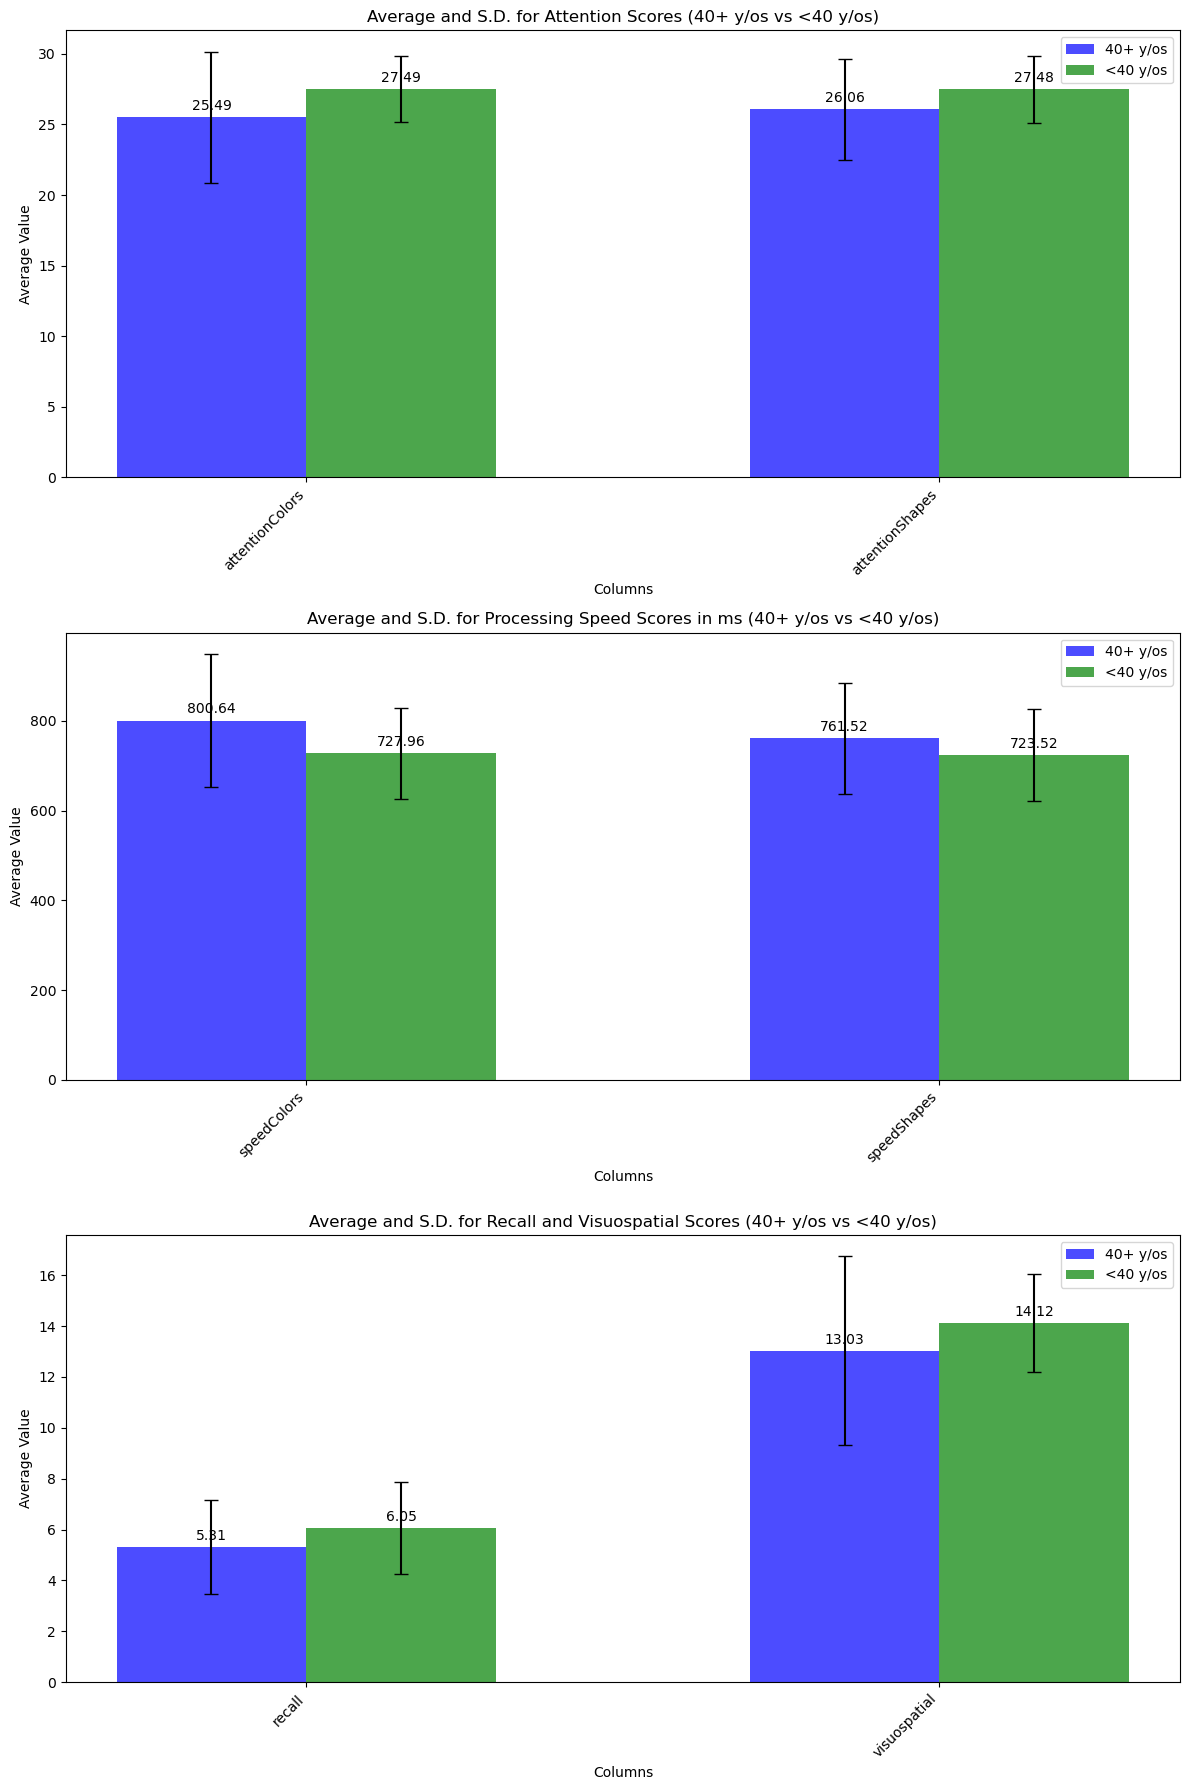

In [83]:
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

plot_histogram("Average and S.D. for Attention Scores (40+ y/os vs <40 y/os)", "40+ y/os", "<40 y/os", axs[0], over40scores, under40scores, 'attentionColors', 'attentionShapes')
plot_histogram("Average and S.D. for Processing Speed Scores in ms (40+ y/os vs <40 y/os)", "40+ y/os", "<40 y/os", axs[1], over40scores, under40scores, 'speedColors', 'speedShapes')
plot_histogram("Average and S.D. for Recall and Visuospatial Scores (40+ y/os vs <40 y/os)", "40+ y/os", "<40 y/os",  axs[2], over40scores, under40scores, 'recall', 'visuospatial')

plt.tight_layout()
plt.show()

# Comparisons between Male and Female

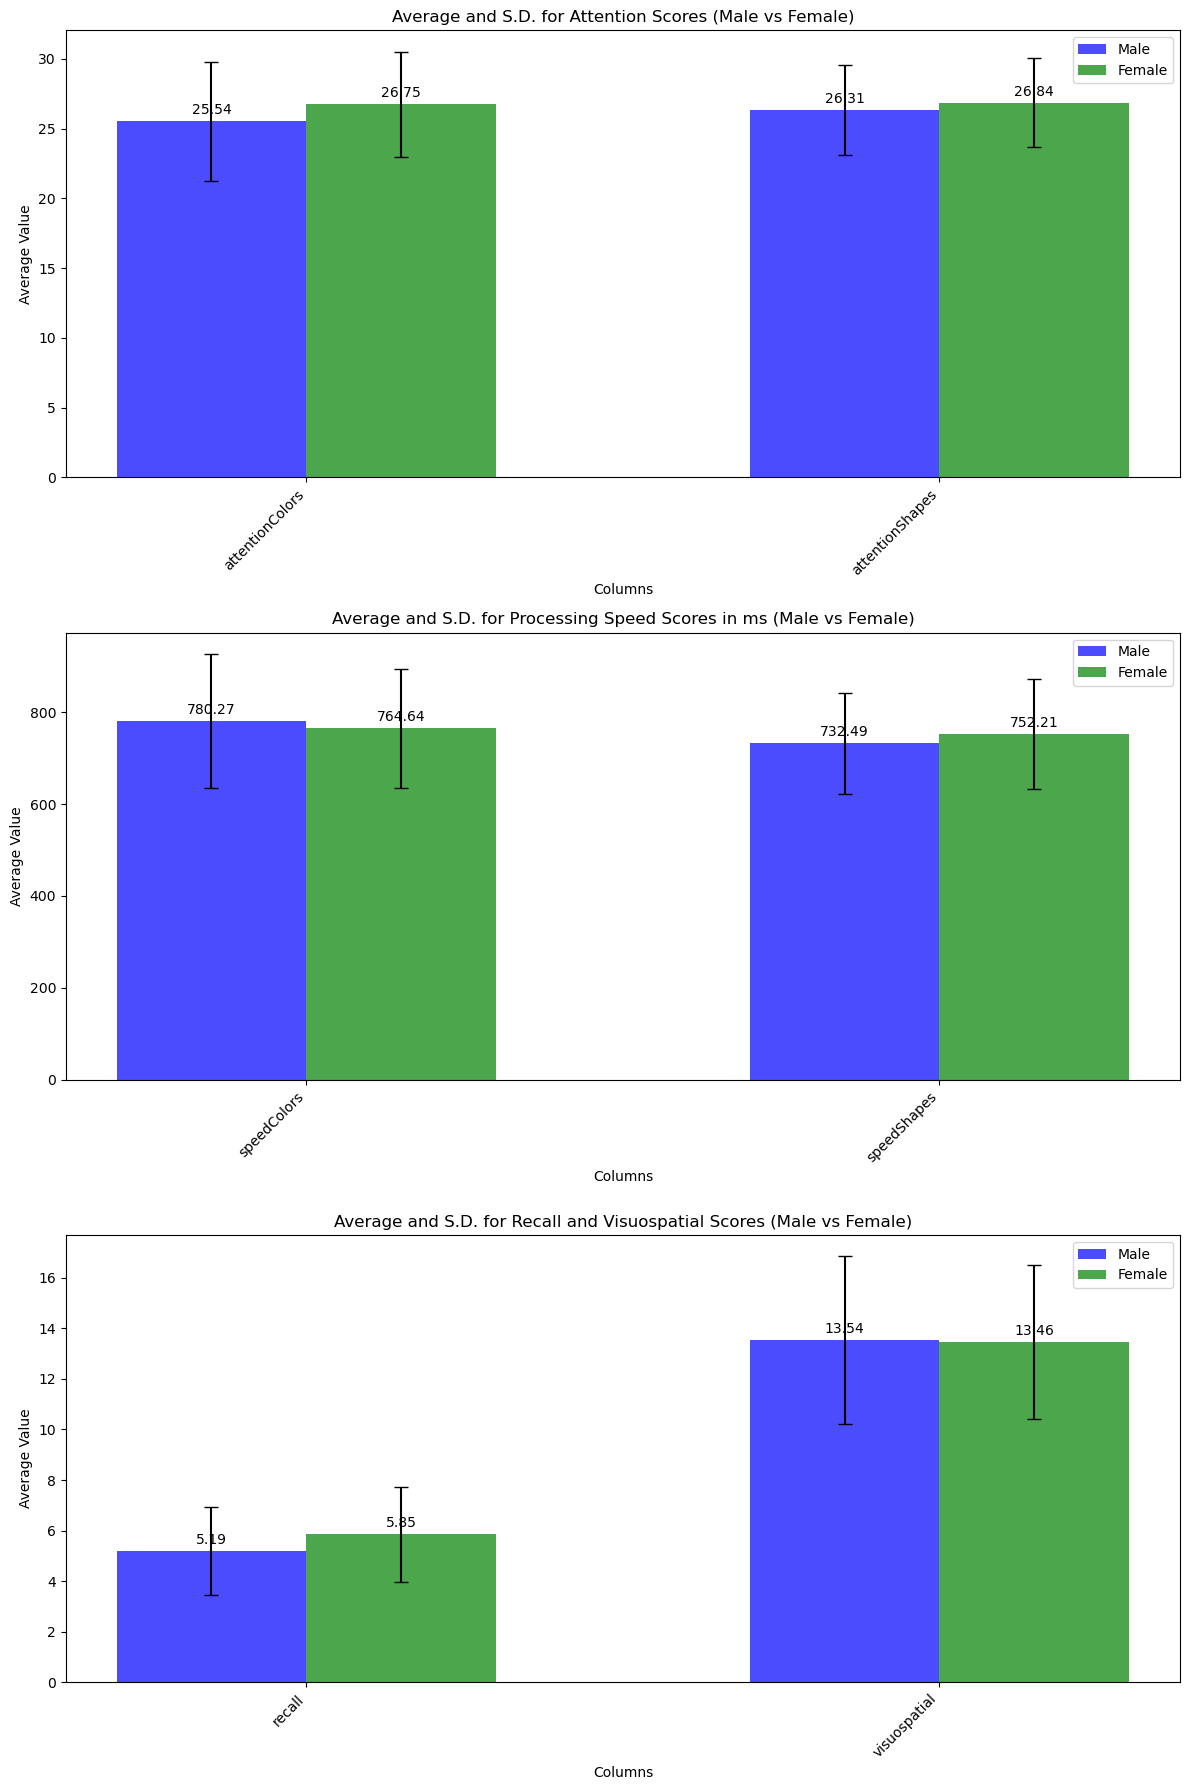

In [84]:
malescores = gameplay_demographics[gameplay_demographics["Sex"] == "Male"]
femalescores = gameplay_demographics[gameplay_demographics["Sex"] == "Female"]

malescores = malescores[["attentionColors", "attentionShapes", "speedColors", "speedShapes", "recall", "visuospatial", "Time taken"]]
femalescores = femalescores[["attentionColors", "attentionShapes", "speedColors", "speedShapes", "recall", "visuospatial", "Time taken"]]

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

plot_histogram("Average and S.D. for Attention Scores (Male vs Female)", "Male", "Female", axs[0], malescores, femalescores, 'attentionColors', 'attentionShapes')
plot_histogram("Average and S.D. for Processing Speed Scores in ms (Male vs Female)", "Male", "Female", axs[1], malescores, femalescores, 'speedColors', 'speedShapes')
plot_histogram("Average and S.D. for Recall and Visuospatial Scores (Male vs Female)", "Male", "Female",  axs[2], malescores, femalescores, 'recall', 'visuospatial')

plt.tight_layout()
plt.show()

# Time Taken Comparisons

In [95]:
print("Average Time taken for Male Participants:", round(avg(malescores["Time taken"]) / 60, 2), "min")
print("Average Time taken for Female Participants:", round(avg(femalescores["Time taken"]) / 60, 2), "min")
print("Average Time taken for 40+ y/o Participants:", round(avg(over40scores["Time taken"]) / 60, 2), "min")
print("Average Time taken for <40 y/o Participants:", round(avg(under40scores["Time taken"]) / 60, 2), "min")

Average Time taken for Male Participants: 7.06 min
Average Time taken for Female Participants: 6.76 min
Average Time taken for 40+ y/o Participants: 6.69 min
Average Time taken for <40 y/o Participants: 7.1 min


In [98]:
print(len(malescores))
print(len(femalescores))

59
114


In [101]:
len(gameplay_demographics[gameplay_demographics["Age"] > 65])

7

In [103]:
seniors = gameplay_demographics[gameplay_demographics["Age"] > 65]
print(avg(seniors["speedColors"]))
print(avg(seniors["speedShapes"]))

1046.4285714285713
954.0


# Distributions

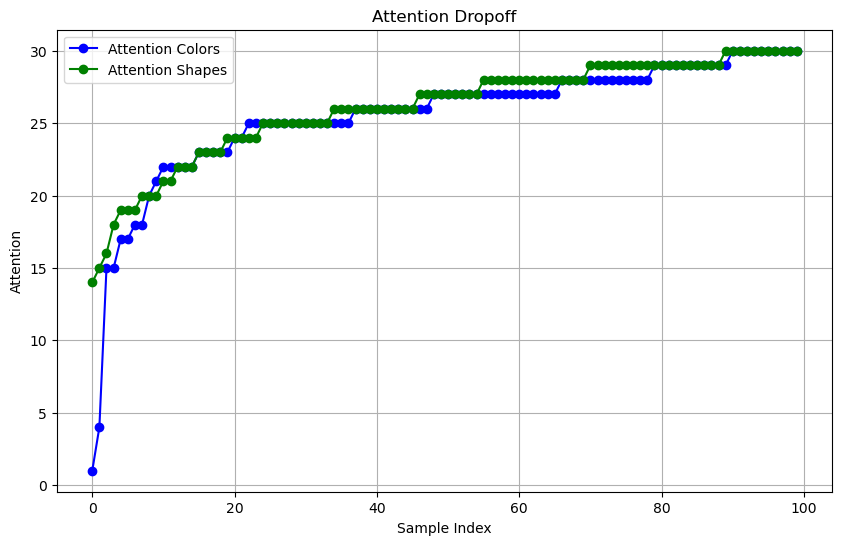

In [125]:
sorted_by_attCol = over40scores.sort_values(by='attentionColors')
sorted_by_attShapes = over40scores.sort_values(by='attentionShapes')

plt.figure(figsize=(10, 6))

plt.plot(range(len(sorted_by_attCol)), sorted_by_attCol['attentionColors'], label = "Attention Colors", marker='o', linestyle='-', color='b')
plt.plot(range(len(sorted_by_attCol)), sorted_by_attShapes['attentionShapes'], label = "Attention Shapes", marker='o', linestyle='-', color='g')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Attention')
plt.title('Attention Dropoff')
plt.grid(True)

plt.show()

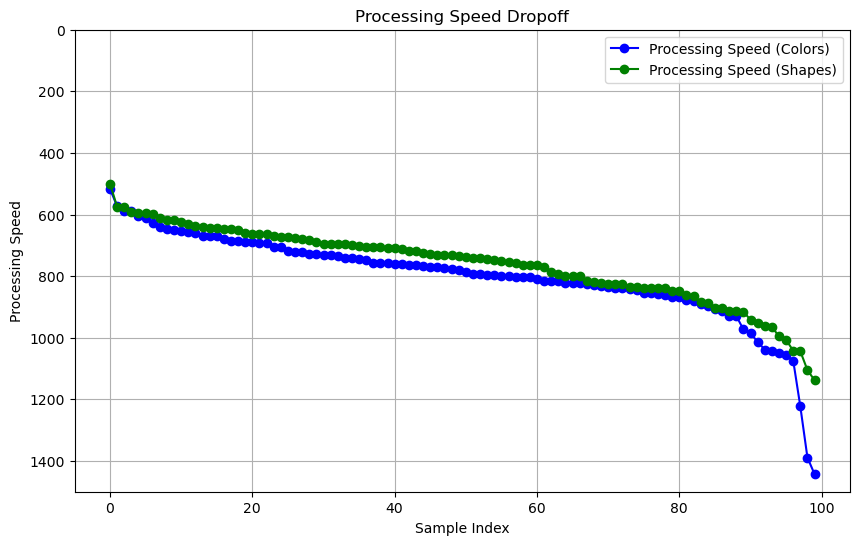

In [127]:
sorted_by_speedCol = over40scores.sort_values(by='speedColors')
sorted_by_speedShapes = over40scores.sort_values(by='speedShapes')

plt.figure(figsize=(10, 6))

plt.plot(range(len(sorted_by_speedCol)), sorted_by_speedCol['speedColors'], label="Processing Speed (Colors)", marker='o', linestyle='-', color='b')
plt.plot(range(len(sorted_by_speedShapes)), sorted_by_speedShapes['speedShapes'], label="Processing Speed (Shapes)", marker='o', linestyle='-', color='g')
plt.xlabel('Sample Index')
plt.ylabel('Processing Speed')
plt.title('Processing Speed Dropoff')
plt.legend()
plt.grid(True)
plt.gca().invert_yaxis()
plt.ylim(1500, 0)

plt.show()

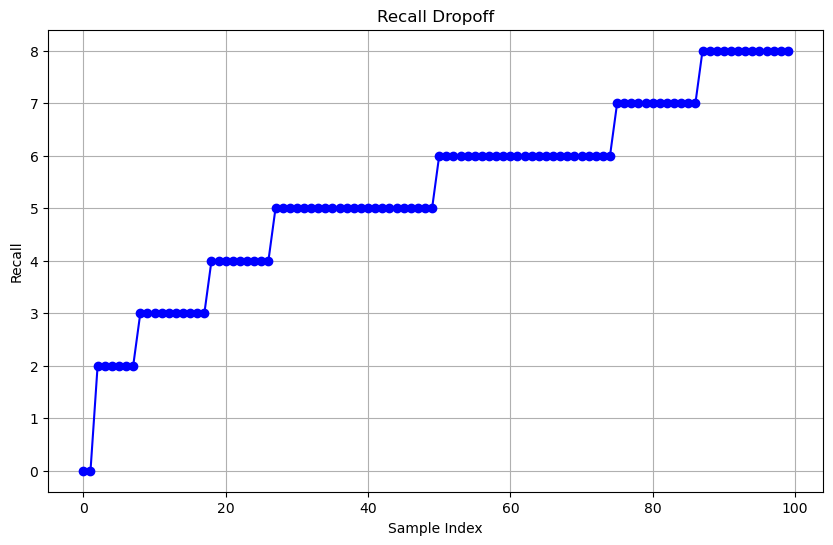

In [122]:
sorted_by_recall = over40scores.sort_values(by='recall')

plt.figure(figsize=(10, 6))

plt.plot(range(len(sorted_by_recall)), sorted_by_recall['recall'], marker='o', linestyle='-', color='b')
plt.xlabel('Sample Index')
plt.ylabel('Recall')
plt.title('Recall Dropoff')
plt.grid(True)

plt.show()

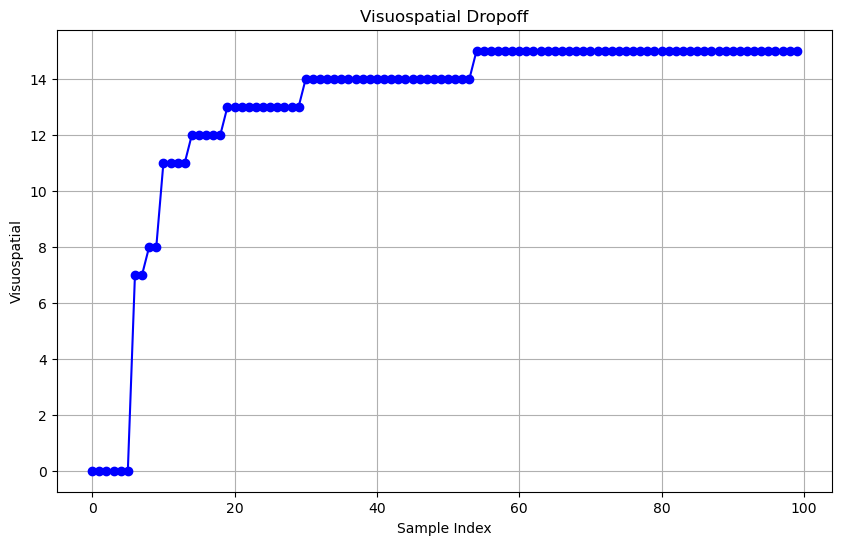

In [123]:
sorted_by_vis = over40scores.sort_values(by='visuospatial')

plt.figure(figsize=(10, 6))

plt.plot(range(len(sorted_by_vis)), sorted_by_vis['visuospatial'], marker='o', linestyle='-', color='b')
plt.xlabel('Sample Index')
plt.ylabel('Visuospatial')
plt.title('Visuospatial Dropoff')
plt.grid(True)

plt.show()

In [ ]:
samples_index = np.arange(100)

over40temp = gameplay_demographics[gameplay_demographics["Age"] >= 40]

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the samples with "placeholder" as x-axis, "Age" as y-axis, and the sample index as z-axis
ax.scatter(over40temp['attentionColors'], over40temp['Age'], samples_index, c='b', marker='o')

# Set labels for each axis
ax.set_xlabel('Placeholder')
ax.set_ylabel('Age')
ax.set_zlabel('Sample Index')

plt.title('3D Scatter Plot of Placeholder, Age, and Sample Index')
plt.show()


In [129]:
gameplay_demographics[gameplay_demographics["Age"] > 70]

,ID,attentionColors,attentionShapes,gameVersion,speedColors,speedShapes,recall,visuospatial,Submission id,Status,...,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
63,5e9c17900ea62712f81d3cd8,1,15,2,1443,1044,6,14,64b8710fc56ff12aee421462,APPROVED,...,89,71,Female,White,United Kingdom,United Kingdom,United Kingdom,English,No,DATA_EXPIRED
95,60a10d794573304f9e614e3f,17,16,2,1044,1105,3,11,64b872cec170c69464df4a4d,APPROVED,...,628,73,Female,White,Australia,Australia,Australia,English,Yes,Part-Time
